<a href="https://colab.research.google.com/github/AYUSH-SHARMA25/HOTEL-BOOKING-ANALYSIS-PROJECT/blob/main/Team_Notebook_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Importing Important Libary**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


# **Importing Dataset From Drive**

In [ ]:
#A simple way to store big data sets is to use CSV files which is seperated by comma separated files
#CSV files contains plain text and is a well know format that can be read by everyone including Pandas.
data = pd.read_csv('/content/Hotel Bookings.csv')

In [ ]:
pd.options.display.max_columns = None

In [ ]:
#The head() method returns the headers and a specified number of rows, starting from the top.
#Note: if the number of rows is not specified, the head() method will return the top 5 rows.
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#There is also a tail() method for viewing the last rows of the DataFrame.
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07



 **There are 119390 Rows and 32 Column in Our dataset**

In [ ]:
data.shape

(119390, 32)

In [ ]:
#info(), that gives you more information about the data set.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### **Data Preparation**

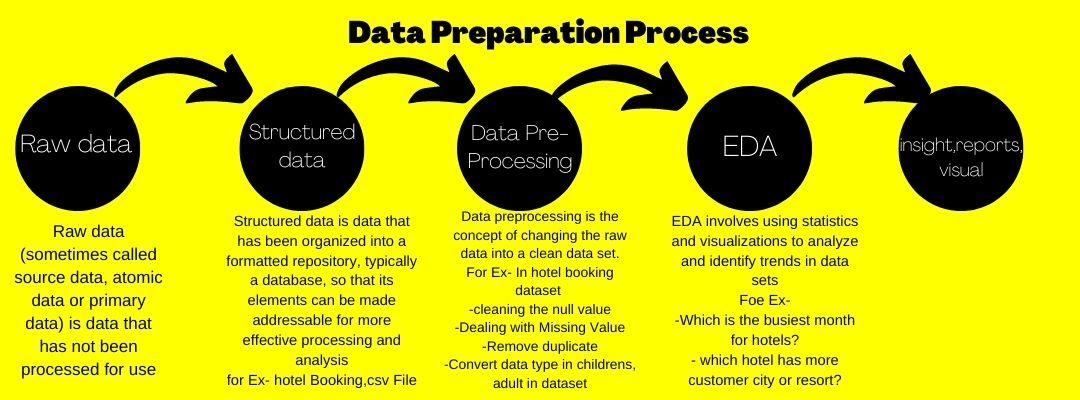

### **Removing columns which are not required for Our Analysis**

In [ ]:

data.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**In Column we Remove "total_of_special_requests" and "reservation_status" which is not required for our analysis** 

In [ ]:
df_column=['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'babies'
       , 'reservation_status_date']

In [ ]:
# We Creating a copy so it not to disturb original dataset
data_frame=data[df_column].copy()

# ***let's find out if any of the columns have any Null Value***

In [ ]:
data_frame.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_

### *We See that there is NUll Value in Childrens, Country, Agent,Company *

### **Children column contains the count of children, so we will replace all the missing values with the 0**

In [ ]:
data_frame['children'].fillna(0,inplace=True)

### **And our country column contains country codes for Ex GBR,PTR representing different countries, so we will replace value with string "XYZ"**

In [ ]:
data_frame['country'].fillna('XYZ',inplace=True)

### **In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0**

In [ ]:
data_frame['agent'].fillna(0,inplace=True)
data_frame['company'].fillna(0,inplace=True)

**Let's create a new column total person by combining adults children and babies**

In [ ]:
data_frame['total_person'] = data_frame['adults'] + data_frame['children'] + data_frame['babies']

# **lets Convert the Datatype**

### **There are some columns like children, company, and agent, that are float type but their values are only in integers**
### **So we will convert them to the integer type**

In [ ]:
data_frame['children'] = data_frame['children'].astype(int)
data_frame['agent'] = data_frame['agent'].astype(int)
data_frame['company'] = data_frame['company'].astype(int)

# ***let's Check Once again if any of the columns have any Null value***

In [ ]:
data_frame.isnull().sum()
# WE see that there is No Null value in Column

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# **Exploratory Analysis and Visualization**

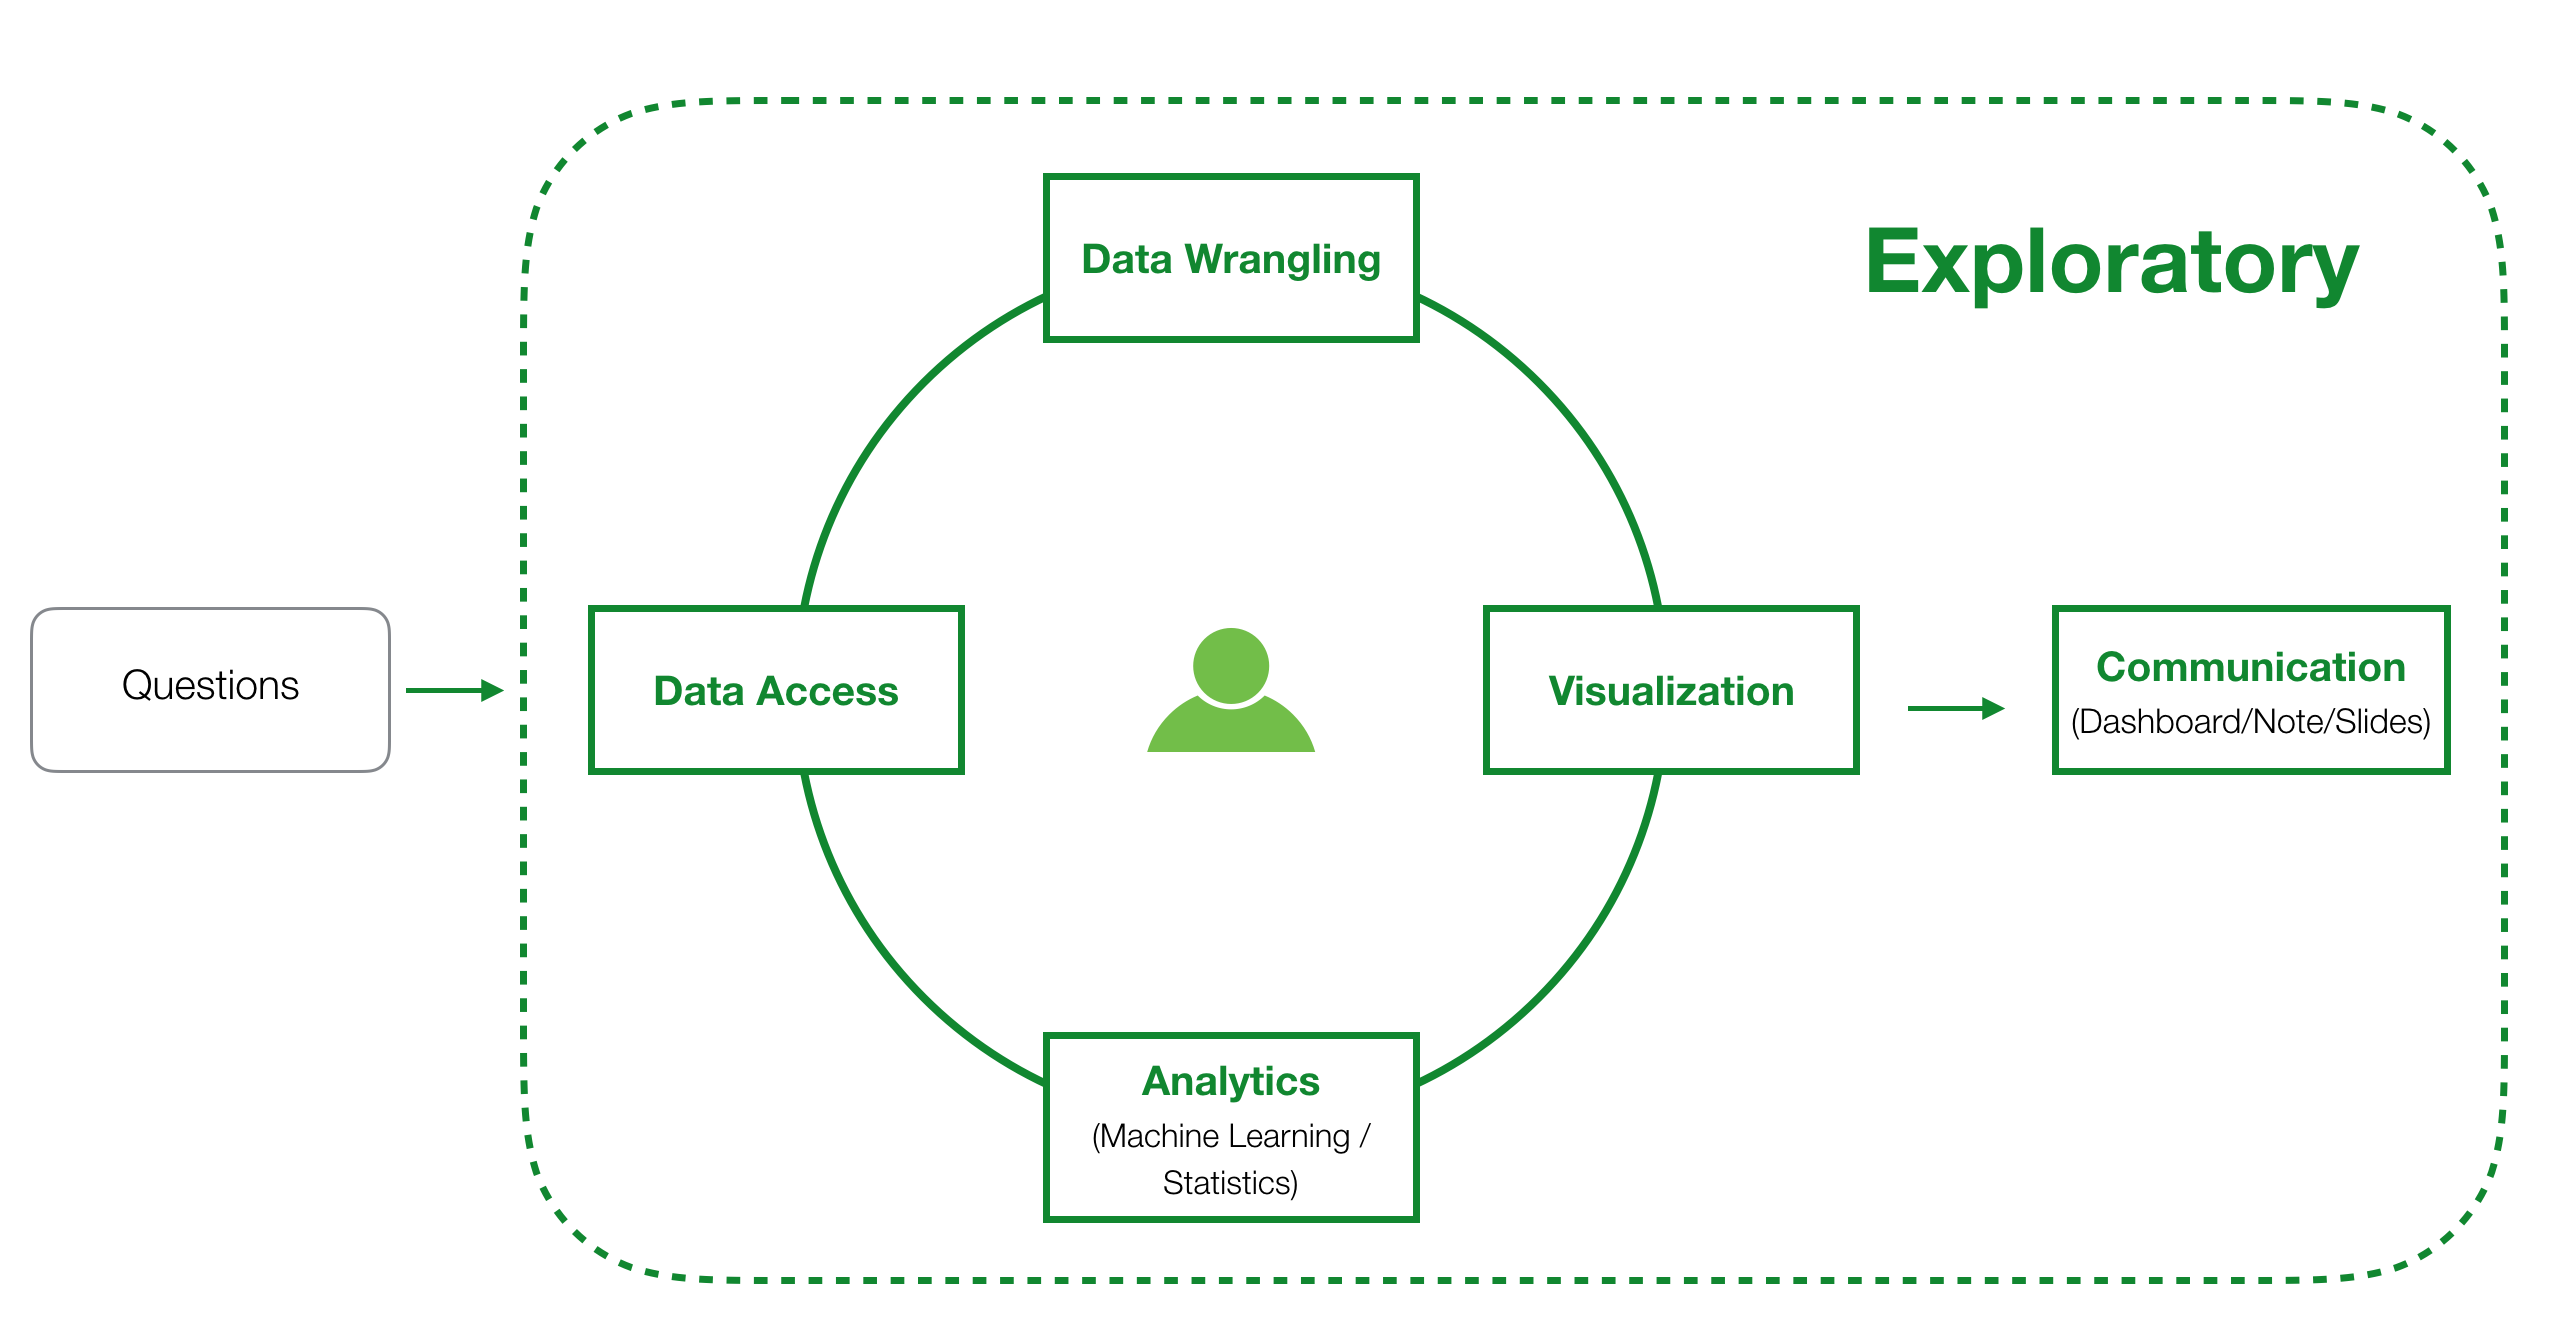

In [ ]:

def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('dark')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
   
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax)
        
    
    plt.show()

In [ ]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

# lets solve the  Question 

### ***Q1. Lets Check Hotel wise yearly bookings***

Text(0.5, 1.0, 'yearly bookings')

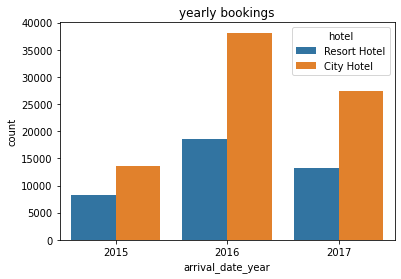

In [ ]:
sns.countplot (x= 'arrival_date_year', data= data_frame,hue='hotel').set_title ('yearly bookings')


### Note: We see that bookings across years is higher for city hotel compared to resort hotel and donot increase proportionately over the years.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


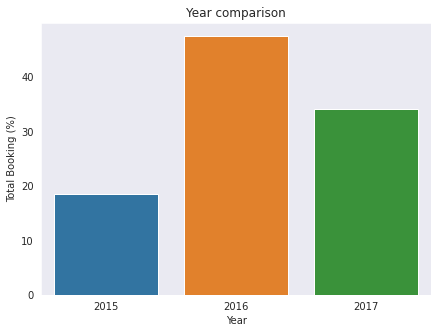

In [ ]:
x,y = get_count(data_frame['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

### Note: We See that 2016 Year is Most Booking year Comparision to the another year 2017 and 2015

### **Q2. What is the booking ratio between Resort Hotel and City Hotel?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


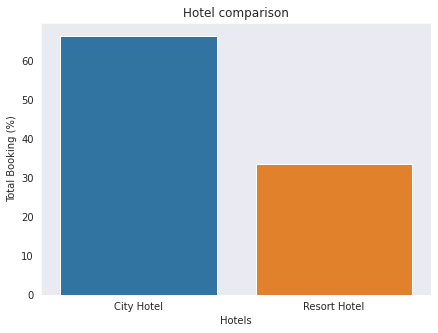

In [ ]:
x,y = get_count(data_frame['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

Note: More than 60% of the population booked the City hotel

### **Q3. How Many Booking Were Cancelled?**

In [ ]:
x,y = get_count(data_frame['is_canceled'])
x,y

(array([0, 1]), array([62.95837172, 37.04162828]))

### is_canceled have two unique values: 1 if booking got canceled, else 0.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


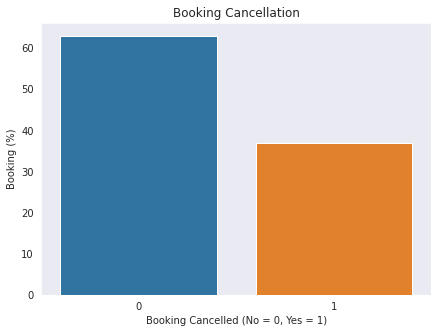

In [ ]:
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)',title='Booking Cancellation')


Note: Bookings got canceled 37% of the time. While booking guest did checkd-in (did not cancel the booking ) almost 63% of the time.

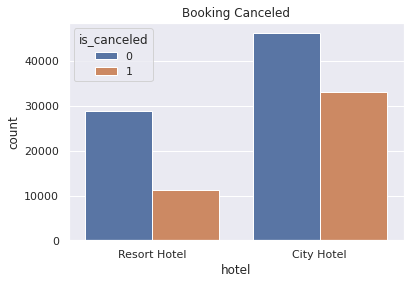

In [ ]:
sns.set(style = "darkgrid")
plt.title("Booking Canceled")
ax = sns.countplot(x = "hotel", hue = 'is_canceled', data =data_frame)

Note:  Around 40% bookings were cancelled in city hotel and 30% in resort hotel.

### **Q4. what percentage of customers were repeated? **

Text(0.5, 1.0, 'Percentage of reapeated guests')

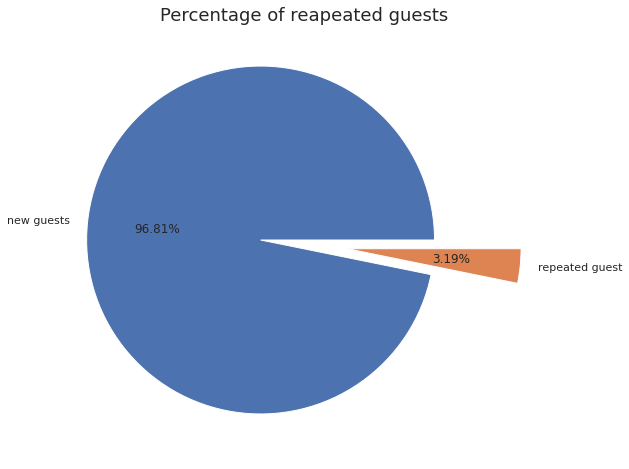

In [ ]:
# now let's percentage of repeated customers 
repeated_cust = data_frame.groupby('is_repeated_guest')
df1 = pd.DataFrame(round((repeated_cust.size()/data_frame.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
labels = 'new guests','repeated guest'
plt.figure(figsize=(8,8))
plt.pie(df1['Booking_%'],autopct="%.2f%%",explode=[0.25]*2,labels=labels)
plt.title('Percentage of reapeated guests',fontsize =18)

There 3.19% of repeated guests

---



### **Q5. Which is the busiest month for hotels?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


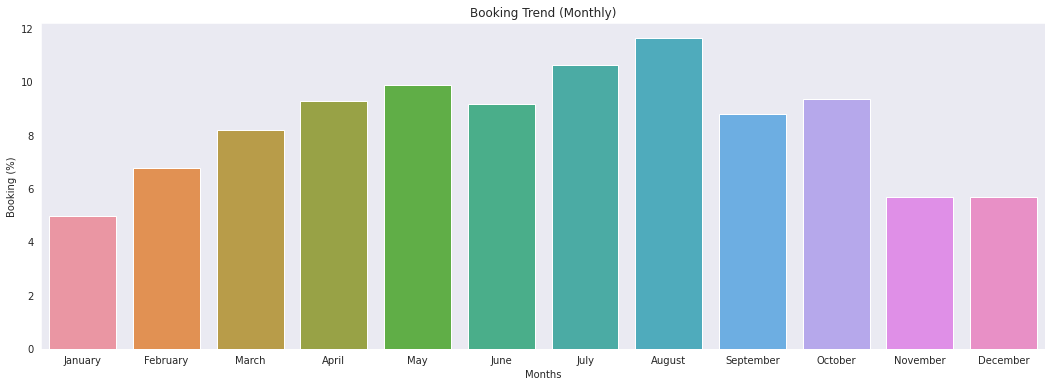

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = data_frame['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100
#sns.lineplot(x, y.values)
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='bar', figsize=(18,6))


As we can see most bookings were made from July to August. And the least bookings were made at the start and end of the year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


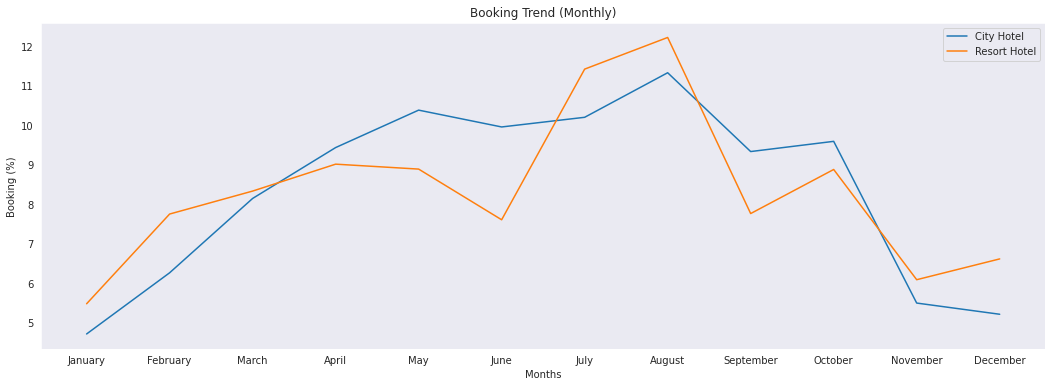

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']


## Select only City Hotel
sorted_months = data_frame.loc[data_frame.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100

## Select only Resort Hotel
sorted_months = data_frame.loc[data_frame.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100

## Draw the line plot
fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')
sns.lineplot(x1, y1.values, label='City Hotel', sort=False)
sns.lineplot(x1, y2.values, label='Resort Hotel', sort=False)

plt.show()

We can see the trend is kind of similar with a small difference. Resort has more bookings at the start and end of the year, and lower booking in June and September.

### **Q6. Market segment wise bookings**

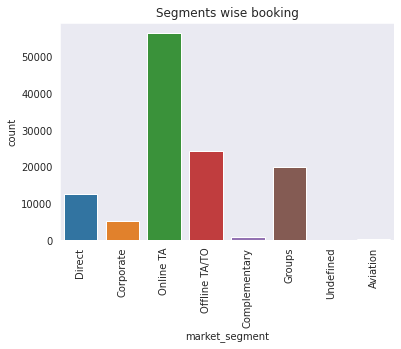

In [ ]:
plt.title("Segments wise booking")
ax = sns.countplot(x = "market_segment", data = data_frame)
plt.xticks(rotation = 90)
plt.show()

Note: Indirect bookings through online and offline travel agents are higher compared to direct bookings and same is the case with group bookings which are also high.

### **Q7. Lets Check monthly cancellations and customer type**

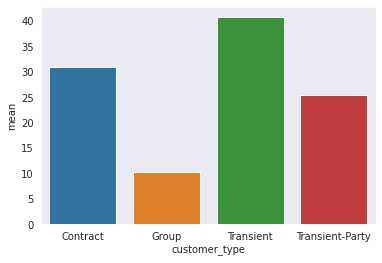

In [ ]:
a = data_frame.groupby("customer_type")['is_canceled'].describe()

sns.barplot(x=a.index, y=a["mean"] * 100)

Note: Transient customer types have higher cancellations.

## **Q8. From which country most guests come?**

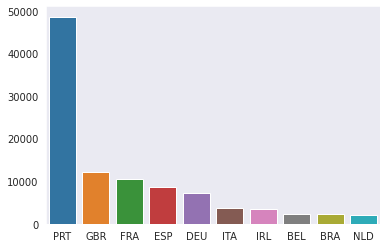

In [ ]:
sns.barplot (y= list(data_frame.country.value_counts().head (10)), x= list(data_frame.country.value_counts().head(10).index))

Note: Portugal, UK and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.

Lets see in Value

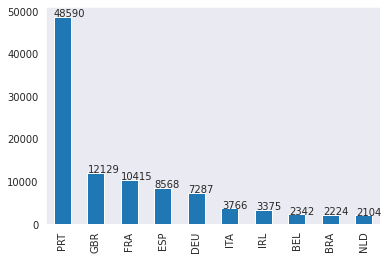

In [ ]:
# plotting graph again with values 
ax= data_frame.country.value_counts().head(10).plot (kind= 'bar');
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### **Q9. Which was the most booked accommodation type (Single, Couple)?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


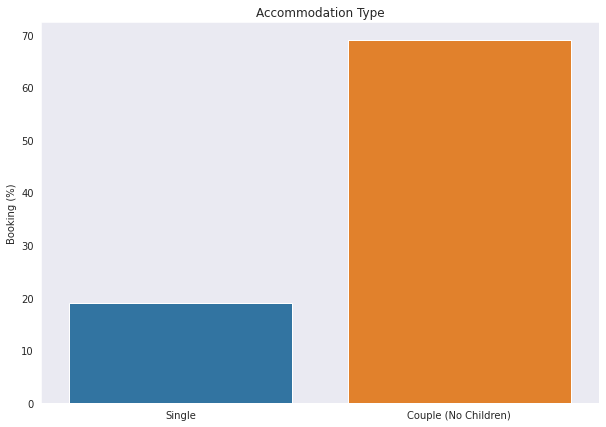

In [ ]:
## Select single, couple, multiple adults and family
single   = data_frame[(data_frame.adults==1) & (data_frame.children==0) ]
couple   = data_frame[(data_frame.adults==2) & (data_frame.children==0) ]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)']
count = [single.shape[0],couple.shape[0]]
count_percent = [x/data_frame.shape[0]*100 for x in count]

## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))


*Couple (or 2 adults) is the most popular accommodation type. So hotels can make plans accordingl*y

### **Q10. How Long People Stay in the hotel?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


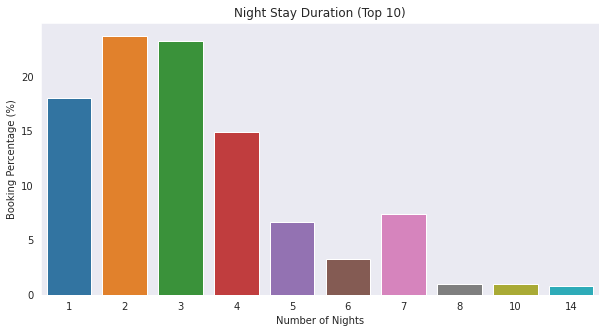

In [ ]:
total_nights = data_frame['stays_in_weekend_nights']+ data_frame['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))


*Most people stay for one, two, or three. More than 60% of guests come under these three options.*

### **Let’s see the stay duration trend for each hotel type.**

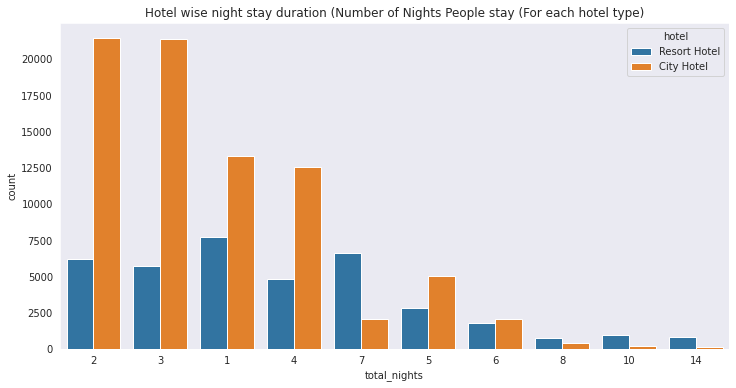

In [ ]:

data_frame.loc[:,'total_nights'] = data_frame['stays_in_weekend_nights']+ data_frame['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Number of Nights People stay (For each hotel type)')
sns.countplot(x='total_nights', hue='hotel', data=data_frame,
              order = data_frame.total_nights.value_counts().iloc[:10].index, ax=ax);

*For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.
For City hotel, most popular stay duration is one, two, seven(week), and three respectively*

### Q.11 **Lets Check relationship between deposit type and cancellation?**

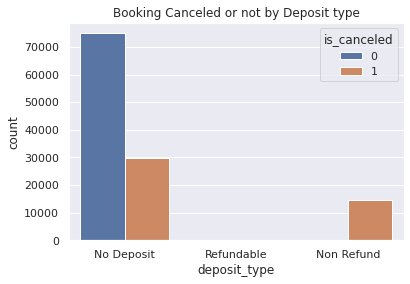

In [ ]:
data_frame[data_frame.deposit_type== 'Refundable'].deposit_type.count()
plt.title("Booking Canceled or not by Deposit type")
sns.countplot(x='deposit_type',data=data_frame ,hue='is_canceled')

*Note: Around 25% of bookings were cancelled by guests with no deposit. These numbers are huge if the hotels were not able to replace the cancelled bookings in time. So it's obvious that guests who do not pay any deposit while booking are likely to cancel more reservations. Also it is interesting to note that non-refundable deposits had more cancellation than refundable deposits. Logically one would have assumed that refundable deposits have more cancellation as hotel rates are usually higher for refundable deposit type rooms and customers pay more in anticipation of cancellation.*

### **Q12. which hotel generated maximum adr?**



Text(0, 0.5, 'ADR')

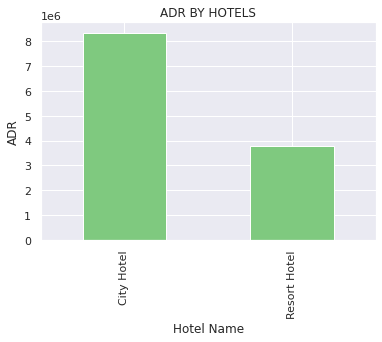

In [ ]:
#  let's see which hotel generated max adr
max_adr = data_frame.groupby(['hotel'])['adr'].sum()

plt.figure(figsize=(6,4))
max_adr.plot(kind='bar',colormap='Accent')
plt.title('ADR BY HOTELS')
plt.xlabel('Hotel Name')
plt.ylabel('ADR')

City Hotel generated maximum adr amoung two of them

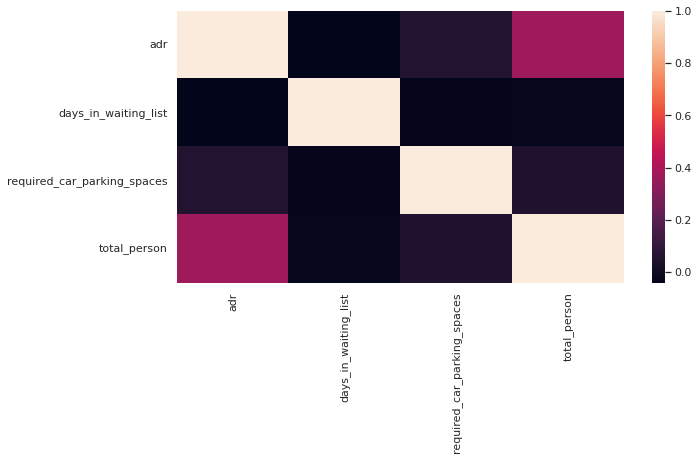

In [ ]:
# now let's see is there any correlation between adr and other columns
df  = data_frame[['adr','days_in_waiting_list','required_car_parking_spaces','total_person']]
corr_df = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

We can clearly see that adr has positive correlation with required_car_parking_spaces and total_person


* which means if the reiquired parking spaces increases the adr for hotel will also increases

* aslo if total person staying increases the adr also increases
   


### **Q.13 Lets Check relationship between market segment and cancellation?**

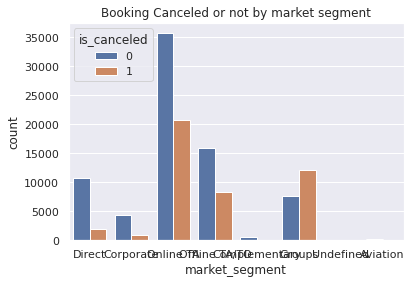

In [ ]:
plt.title("Booking Canceled or not by market segment")
sns.countplot(x='market_segment',data=data_frame ,hue='is_canceled')

*Note: Groups segment has cancellation rate around 50%. Offline TA/TO (Travel Agents/Tour Operators) and Online TA has cancellation rate more than 33%. It is surprising that the cancellation rate in these segments is high despite the application of a deposit. The fact that cancellations are made collectively like group reservations has high cancellation rate. It is interesting to note that direct segment has cancellation rate less than 20%.*

Conclusion:
We used the dataset that contains data about hotel bookings

We cleaned and preprocessed the data and then we performed the exploratory data analysis to extract information from the data to answer the following questions.

1.   Lets Check Hotel wise yearly bookings?
2.   What is the booking ratio between Resort Hotel and City Hotel?
3.   How Many Booking Were Cancelled?
4. what percentage of customers were repeated? 
5.   Which is the busiest month for hotels?
6.   Market segment wise bookings
7.   Lets Check monthly cancellations and customer type
8.   From which country most guests come?
9.   Which was the most booked accommodation type (Single, Couple)?
10.   How Long People Stay in the hotel?
11.  Lets Check relationship between deposit type and cancellation?
12. which hotel generated maximum adr?
13.  Lets Check relationship between market segment and cancellation? 




### **We Learned that -**


*   We See that 2016 Year is Most Booking year Comparision to the another year 2017 and 2015
*   We see that bookings across years is higher for city hotel compared to resort hotel and donot increase proportionately over the years
*   We see that More than 60% of the population booked the City hotel
*   Bookings got canceled 37% of the time. While booking guest did checkd-in (did not cancel the booking ) almost 63% of the time.  
*   We see that Around 40% bookings were cancelled in city hotel and 30% in resort hotel.
*   we can see most bookings were made from July to August. And the least bookings were made at the start and end of the year
*   We can see Resort has more bookings at the start and end of the year, and lower booking in June and September.
*    Indirect bookings through online and offline travel agents are higher compared to direct bookings and same is the case with group bookings which are also high.
*   We see Transient customer types have higher cancellations.
*   Portugal, UK and France, Spain and Germany are the top countries from most guests come, more than 70- 80% come from these 5 countries.
*   We see that Couple (or 2 adults) is the most popular accommodation type
*  We see that  More that 60% guest stay for one, two, or three
*  We see that Resort hotel, the most popular stay duration is three, two, one, and four days respectively. For City hotel, most popular stay duration is one, two, seven(week), and three respectively
*  We see that ancellations are high when done through agents compared to direct bookings. Hotels need to do marketing and give special incentives for direct bookings as these may establish personal one to one relationships promoting customer loyalty
*   Further we also came to know that out of total bookings 3.19% of bookings were of repeated guests whereas 96.81% of bookings were of new guests.
*   The adr earned by City Hotel was more than Resort Hotel

*  Further we came to know that there is positive correlation between adr total person and parking spaces which means if the required parking spaces increases the adr for hotel will also increases






